# Image Classification on Fashion-MNIST.

__Objective:__ To classify images of different pieces of clothing.

__Client & Data-Set:__ Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

Data-set is publicly available on kaggle and __[Zalando Fashion MNIST repository](https://github.com/zalandoresearch/fashion-mnist)__ on Github.

Fashion-MNIST is intended as direct drop-in replacement for the original MNIST dataset. It shares the same image size and structure of training and testing splits.

__Business Impact:__ E-commerce companies have lots of items for sale online which requires lots of images to be displayed on their websites, applications and on social media. And it takes lot of human power and time to separate these images into respective groups. This classifier which we are going to build helps businesses to categorize images into respective groups.

__Labels:__ Each training and test example is assigned to one of the following labels:

•	0 - T-shirt/top 
•	1 - Trouser 
•	2 - Pullover 
•	3 - Dress 
•	4 - Coat 
•	5 - Sandal 
•	6 - Shirt 
•	7 - Sneaker 
•	8 - Bag 
•	9 - Ankle boot 

### Importing Libraries. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Importing Data.

In [3]:
train_data = pd.read_csv('/home/ubuntu/fashion-mnist_train.csv')
test_data = pd.read_csv('/home/ubuntu/fashion-mnist_test.csv')

train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Wrangling.

In [4]:
print('train data shape : {}'.format(train_data.shape))
print('test data shape : {}'.format(test_data.shape))

train data shape : (60000, 785)
test data shape : (10000, 785)


In [5]:
train_data = np.array(train_data, dtype= 'float32')
test_data = np.array(test_data, dtype= 'float32')

### Slicing the labels and Normalizing the pixel data.

In [6]:
X_train_orig = train_data[:, 1:]/ 255
y_train_orig = train_data[:, 0]

X_test = test_data[:, 1:]/ 255
Y_test = test_data[:, 0]

### Creating validation set.

In [7]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train_orig, y_train_orig, test_size = 0.2, random_state=42)

# Data Exploration.

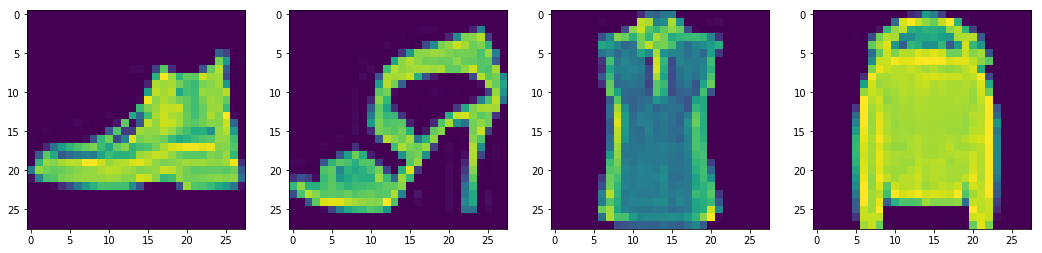

In [8]:
# Lets check some images
plt.figure(figsize = (18,6))

plt.subplot(141)
image = X_train[49].reshape(28, 28)
plt.imshow(image)

plt.subplot(142)
image = X_train[3].reshape(28, 28)
plt.imshow(image)

plt.subplot(143)
image = X_train[6].reshape(28, 28)
plt.imshow(image)

plt.subplot(144)
image = X_train[8].reshape(28, 28)
plt.imshow(image)
plt.show()

# Neural Network - 2-Layers

In [8]:
n_cols = X_train.shape[1]
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(n_cols,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=Adam(lr = 0.0001),
              loss='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [11]:
model_1 = model.fit(X_train, y_train,
                    batch_size=300,
                    epochs = 20,
                    verbose=1,
                    validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 79us/step - loss: 0.9670 - acc: 0.7033 - val_loss: 0.5989 - val_acc: 0.7977
Epoch 2/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.5364 - acc: 0.8235 - val_loss: 0.4923 - val_acc: 0.8342
Epoch 3/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.4668 - acc: 0.8419 - val_loss: 0.4502 - val_acc: 0.8455
Epoch 4/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.4313 - acc: 0.8532 - val_loss: 0.4272 - val_acc: 0.8507
Epoch 5/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.4086 - acc: 0.8598 - val_loss: 0.4066 - val_acc: 0.8584
Epoch 6/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.3902 - acc: 0.8647 - val_loss: 0.3955 - val_acc: 0.8612
Epoch 7/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.3742 - acc: 0.8708 - val_loss: 0.3823 - val_acc

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.31694959959983826
Test accuracy: 88.78


### Image Reshaping & One-hot Encoding.

In [9]:
image_rows = 28
image_cols = 28
input_shape = (image_rows, image_cols, 1)

X_train = X_train.reshape(X_train.shape[0], image_rows, image_cols, 1)
X_test = X_test.reshape(X_test.shape[0], image_rows, image_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], image_rows, image_cols, 1)

print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))
print('x_validate shape: {}'.format(X_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [10]:
# One-hot encoding
y_train = to_categorical(y_train, 10)
y_validate = to_categorical(y_validate, 10)
y_test = to_categorical(Y_test, 10)

# CNN - 1 Convolution layer

In [15]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten()) 

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))

cnn_model.add(Dense(10, activation='softmax'))

In [16]:
cnn_model.compile(optimizer= Adam(lr= 0.0001),
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [17]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total para

In [18]:
history = cnn_model.fit(X_train, y_train,
          batch_size=300,
          epochs=50,
          verbose=1,
          validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 90us/step - loss: 1.1882 - acc: 0.6362 - val_loss: 0.6505 - val_acc: 0.7840
Epoch 2/50
48000/48000 [==============================] - 2s 49us/step - loss: 0.6393 - acc: 0.7807 - val_loss: 0.5241 - val_acc: 0.8178
Epoch 3/50
48000/48000 [==============================] - 2s 49us/step - loss: 0.5465 - acc: 0.8095 - val_loss: 0.4713 - val_acc: 0.8342
Epoch 4/50
48000/48000 [==============================] - 2s 49us/step - loss: 0.4983 - acc: 0.8270 - val_loss: 0.4406 - val_acc: 0.8479
Epoch 5/50
48000/48000 [==============================] - 2s 49us/step - loss: 0.4700 - acc: 0.8354 - val_loss: 0.4128 - val_acc: 0.8543
Epoch 6/50
48000/48000 [==============================] - 2s 49us/step - loss: 0.4438 - acc: 0.8441 - val_loss: 0.3959 - val_acc: 0.8613
Epoch 7/50
48000/48000 [==============================] - 2s 49us/step - loss: 0.4268 - acc: 0.8499 - val_loss: 0.3838 - val_acc

In [19]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.24525116918087006
Test accuracy: 91.21000000000001


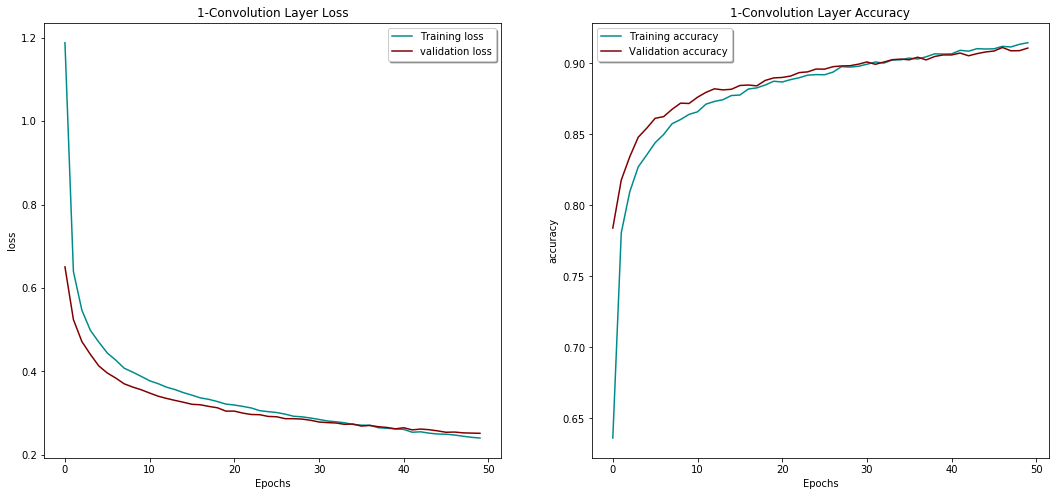

In [20]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('1-Convolution Layer Loss')
plt.subplot(122)
plt.plot(history.history['acc'], color='darkcyan', label="Training accuracy")
plt.plot(history.history['val_acc'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('1-Convolution Layer Accuracy')
plt.show()

# CNN - 2 Convolution layers

In [21]:
cnn_model_2 = Sequential()

cnn_model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model_2.add(Dropout(0.2))
cnn_model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model_2.add(Dropout(0.3))
cnn_model_2.add(Flatten())

cnn_model_2.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
cnn_model_2.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

cnn_model_2.add(Dense(10, activation='softmax'))

In [22]:
cnn_model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_3 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                589888    
__________

In [23]:
cnn_model_2.compile(optimizer= Adam(lr= 0.0001),
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [24]:
early_stopping_monitor = EarlyStopping(patience = 3)

In [25]:
history_2 = cnn_model_2.fit(X_train, y_train,
          batch_size= 300,
          epochs=50,
          verbose=1,
          validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 7s 150us/step - loss: 1.1219 - acc: 0.6448 - val_loss: 0.6403 - val_acc: 0.7589
Epoch 2/50
48000/48000 [==============================] - 7s 141us/step - loss: 0.5834 - acc: 0.7877 - val_loss: 0.5400 - val_acc: 0.7995
Epoch 3/50
48000/48000 [==============================] - 7s 141us/step - loss: 0.5120 - acc: 0.8134 - val_loss: 0.4819 - val_acc: 0.8292
Epoch 4/50
48000/48000 [==============================] - 7s 141us/step - loss: 0.4721 - acc: 0.8313 - val_loss: 0.4445 - val_acc: 0.8450
Epoch 5/50
48000/48000 [==============================] - 7s 141us/step - loss: 0.4472 - acc: 0.8404 - val_loss: 0.4283 - val_acc: 0.8528
Epoch 6/50
48000/48000 [==============================] - 7s 141us/step - loss: 0.4276 - acc: 0.8482 - val_loss: 0.4113 - val_acc: 0.8578
Epoch 7/50
48000/48000 [==============================] - 7s 142us/step - loss: 0.4098 - acc: 0.8546 - val_loss: 0.4040 - 

In [26]:
score = cnn_model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.23178010219931602
Test accuracy: 91.83


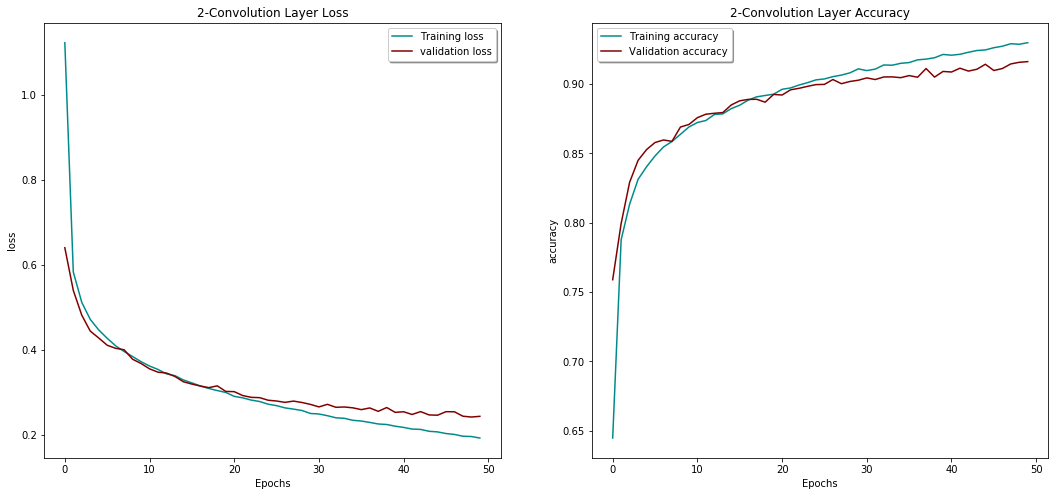

In [27]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_2.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_2.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('2-Convolution Layer Loss')
plt.subplot(122)
plt.plot(history_2.history['acc'], color='darkcyan', label="Training accuracy")
plt.plot(history_2.history['val_acc'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('2-Convolution Layer Accuracy')
plt.show()

# CNN - 3 Convolution Layers

In [28]:
cnn_model_3 = Sequential()

cnn_model_3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model_3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn_model_3.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model_3.add(Dropout(0.3))
cnn_model_3.add(Flatten()) 

cnn_model_3.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

cnn_model_3.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

cnn_model_3.add(Dense(10, activation='softmax'))

In [29]:
cnn_model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
__________

In [30]:
cnn_model_3.compile(optimizer= Adam(lr= 0.0001),
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [31]:
history_3 = cnn_model_3.fit(X_train, y_train,
                            batch_size=300,
                            epochs=50,
                            verbose=1,
                            validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 8s 172us/step - loss: 1.1699 - acc: 0.6042 - val_loss: 0.6510 - val_acc: 0.7428
Epoch 2/50
48000/48000 [==============================] - 8s 162us/step - loss: 0.6085 - acc: 0.7662 - val_loss: 0.5555 - val_acc: 0.7800
Epoch 3/50
48000/48000 [==============================] - 8s 162us/step - loss: 0.5229 - acc: 0.8045 - val_loss: 0.4808 - val_acc: 0.8269
Epoch 4/50
48000/48000 [==============================] - 8s 162us/step - loss: 0.4772 - acc: 0.8256 - val_loss: 0.4330 - val_acc: 0.8438
Epoch 5/50
48000/48000 [==============================] - 8s 162us/step - loss: 0.4454 - acc: 0.8395 - val_loss: 0.4135 - val_acc: 0.8487
Epoch 6/50
48000/48000 [==============================] - 8s 163us/step - loss: 0.4211 - acc: 0.8485 - val_loss: 0.3974 - val_acc: 0.8595
Epoch 7/50
48000/48000 [==============================] - 8s 162us/step - loss: 0.4009 - acc: 0.8571 - val_loss: 0.3774 - 

In [32]:
score = cnn_model_3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.20917014858722688
Test accuracy: 92.54


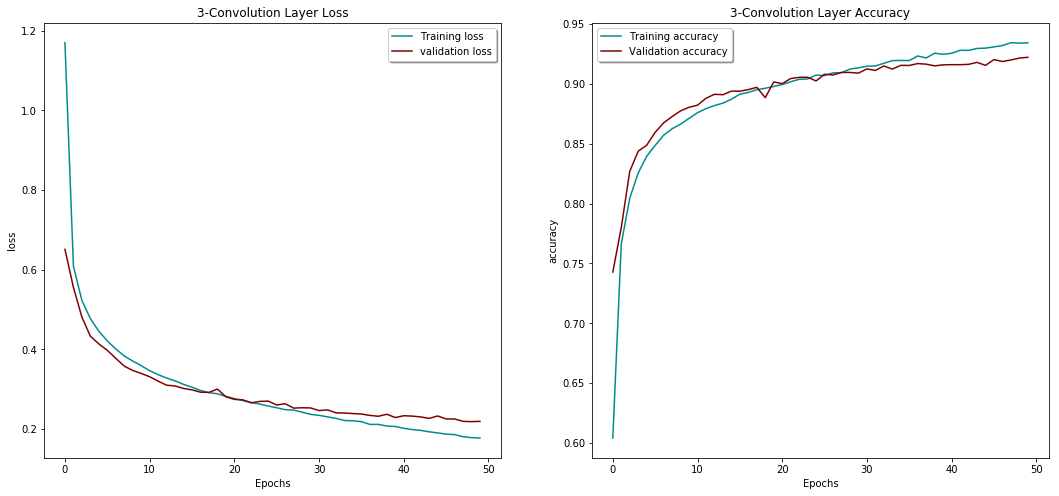

In [33]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_3.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_3.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('3-Convolution Layer Loss')
plt.subplot(122)
plt.plot(history_3.history['acc'], color='darkcyan', label="Training accuracy")
plt.plot(history_3.history['val_acc'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('3-Convolution Layer Accuracy')
plt.show()

# CNN - 4 Convolution Layers with Padding.

__Padding:__ Sometimes, it is convenient to pad the input matrix with zeros around the border, so that we can apply the filter to bordering elements of our input image matrix.

In [34]:
cnn_model_4 = Sequential()

cnn_model_4.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape))
cnn_model_4.add(Dropout(0.4))
cnn_model_4.add(Conv2D(64, 3, padding='same', activation='relu'))
cnn_model_4.add(MaxPooling2D(2))

cnn_model_4.add(Conv2D(128, 3, padding='same', activation ='relu'))
cnn_model_4.add(Dropout(0.4))
cnn_model_4.add(Conv2D(256, 3, padding='same', activation ='relu'))
cnn_model_4.add(MaxPooling2D(2, 2))
cnn_model_4.add(Dropout(0.4))

cnn_model_4.add(Flatten())
cnn_model_4.add(Dense(128, activation='relu'))
cnn_model_4.add(Dropout(0.5))

cnn_model_4.add(Dense(256, activation='relu'))
cnn_model_4.add(Dropout(0.5))

cnn_model_4.add(Dense(512, activation='relu'))
cnn_model_4.add(Dropout(0.5))

cnn_model_4.add(Dense(10, activation='softmax'))

In [35]:
cnn_model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_10 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 256)       295168    
__________

In [36]:
cnn_model_4.compile(optimizer=Adam(lr = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
history_4 = cnn_model_4.fit(X_train, y_train,
                            validation_data=(X_validate, y_validate),
                            epochs=90, 
                            batch_size=300)

Train on 48000 samples, validate on 12000 samples
Epoch 1/90
48000/48000 [==============================] - 20s 412us/step - loss: 1.7028 - acc: 0.3488 - val_loss: 1.1716 - val_acc: 0.6184
Epoch 2/90
48000/48000 [==============================] - 19s 388us/step - loss: 1.0616 - acc: 0.5964 - val_loss: 0.7216 - val_acc: 0.7605
Epoch 3/90
48000/48000 [==============================] - 19s 388us/step - loss: 0.8065 - acc: 0.7033 - val_loss: 0.6079 - val_acc: 0.7792
Epoch 4/90
48000/48000 [==============================] - 19s 389us/step - loss: 0.7064 - acc: 0.7404 - val_loss: 0.5519 - val_acc: 0.7999
Epoch 5/90
48000/48000 [==============================] - 19s 388us/step - loss: 0.6432 - acc: 0.7641 - val_loss: 0.5063 - val_acc: 0.8182
Epoch 6/90
48000/48000 [==============================] - 19s 388us/step - loss: 0.6057 - acc: 0.7779 - val_loss: 0.4811 - val_acc: 0.8334
Epoch 7/90
48000/48000 [==============================] - 19s 388us/step - loss: 0.5768 - acc: 0.7945 - val_loss: 0.

In [38]:
score = cnn_model_4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.18306758351325988
Test accuracy: 93.56


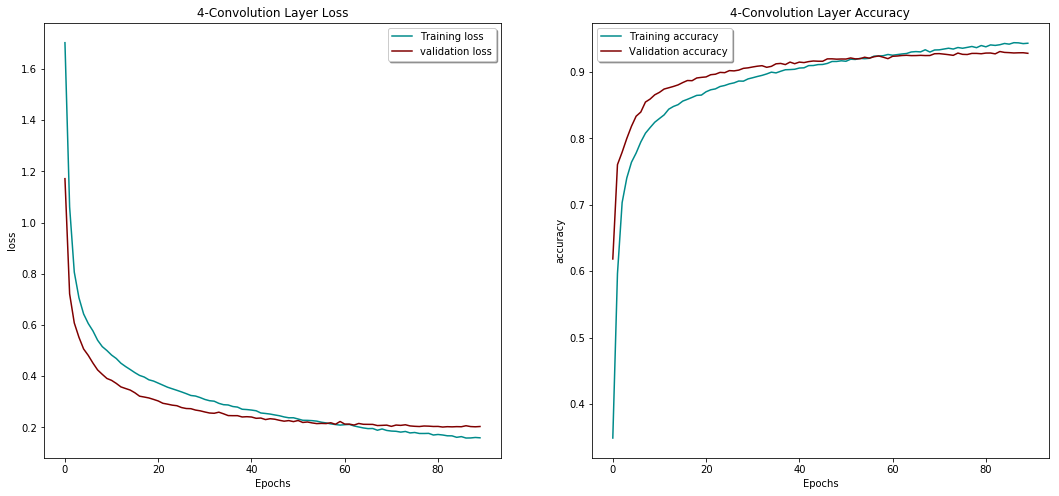

In [39]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_4.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_4.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('4-Convolution Layer Loss')
plt.subplot(122)
plt.plot(history_4.history['acc'], color='darkcyan', label="Training accuracy")
plt.plot(history_4.history['val_acc'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('4-Convolution Layer Accuracy')
plt.show()

# CNN - 5 Convolution Layers with Padding.

In [47]:
cnn_model_5 = Sequential()

cnn_model_5.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Conv2D(64, 3, padding='same', activation='relu'))
cnn_model_5.add(MaxPooling2D(2))

cnn_model_5.add(Conv2D(128, 3, padding='same', activation ='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Conv2D(256, 3, padding='same', activation ='relu'))
cnn_model_5.add(MaxPooling2D(2, 2))

cnn_model_5.add(Conv2D(512, 3, padding='same', activation ='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(MaxPooling2D(2, 2))

cnn_model_5.add(Dropout(0.3))

cnn_model_5.add(Flatten())

cnn_model_5.add(Dense(256, activation='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Dense(512, activation='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Dense(1024, activation='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Dense(10, activation='softmax'))

In [48]:
cnn_model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_30 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
dropout_31 (Dropout)         (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 256)       295168    
__________

In [49]:
cnn_model_5.compile(optimizer=Adam(lr = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
history_5 = cnn_model_5.fit(X_train, y_train,
                    validation_data=(X_validate, y_validate),
                    epochs=90, 
                    batch_size=300)

Train on 48000 samples, validate on 12000 samples
Epoch 1/90
48000/48000 [==============================] - 26s 547us/step - loss: 1.6639 - acc: 0.3391 - val_loss: 1.5147 - val_acc: 0.5565
Epoch 2/90
48000/48000 [==============================] - 25s 527us/step - loss: 1.0232 - acc: 0.5954 - val_loss: 1.0511 - val_acc: 0.7092
Epoch 3/90
48000/48000 [==============================] - 25s 528us/step - loss: 0.7709 - acc: 0.7039 - val_loss: 0.8560 - val_acc: 0.7479
Epoch 4/90
48000/48000 [==============================] - 25s 529us/step - loss: 0.6796 - acc: 0.7420 - val_loss: 0.7847 - val_acc: 0.7675
Epoch 5/90
48000/48000 [==============================] - 25s 529us/step - loss: 0.6201 - acc: 0.7637 - val_loss: 0.6965 - val_acc: 0.7960
Epoch 6/90
48000/48000 [==============================] - 25s 528us/step - loss: 0.5776 - acc: 0.7803 - val_loss: 0.6121 - val_acc: 0.8182
Epoch 7/90
48000/48000 [==============================] - 25s 528us/step - loss: 0.5381 - acc: 0.7963 - val_loss: 0.

In [51]:
score = cnn_model_5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.1772513091236353
Test accuracy: 93.78999999999999


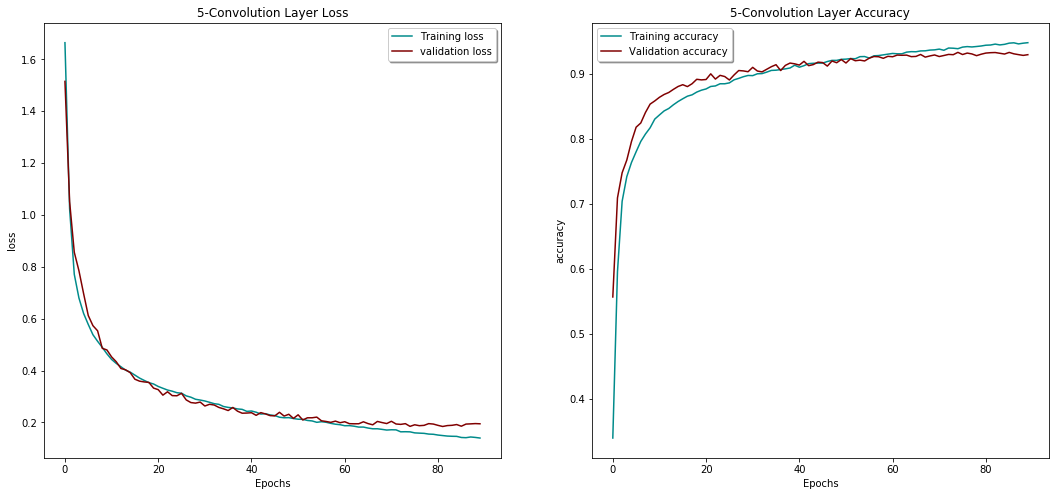

In [52]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_5.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_5.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('5-Convolution Layer Loss')
plt.subplot(122)
plt.plot(history_5.history['acc'], color='darkcyan', label="Training accuracy")
plt.plot(history_5.history['val_acc'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('5-Convolution Layer Accuracy')
plt.show()

# Image Augmentation

Deep networks need large amount of training data to achieve good performance. To build a powerful image classifier using very little training data, image augmentation is usually required to boost the performance of deep networks. Image augmentation artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear, zoom and flips, etc.

In [18]:
imgen = ImageDataGenerator(rotation_range=10,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           shear_range=0.15,
                           zoom_range=0.1,
                           horizontal_flip=True,
                           vertical_flip=False)

In [54]:
history_6 = cnn_model_5.fit_generator(imgen.flow(X_train, y_train,
                                         batch_size = 300),
                              steps_per_epoch = 48000//150,
                              epochs=70,
                              validation_data = imgen.flow(X_validate, y_validate,
                                                           batch_size = 300),
                              validation_steps=12000//150,
                              use_multiprocessing = True)

Epoch 1/70
320/320 [==============================] - 52s 163ms/step - loss: 0.4786 - acc: 0.8315 - val_loss: 0.3883 - val_acc: 0.8547
Epoch 2/70
320/320 [==============================] - 52s 163ms/step - loss: 0.3837 - acc: 0.8618 - val_loss: 0.3527 - val_acc: 0.8715
Epoch 3/70
320/320 [==============================] - 52s 164ms/step - loss: 0.3632 - acc: 0.8702 - val_loss: 0.3244 - val_acc: 0.8839
Epoch 4/70
320/320 [==============================] - 52s 164ms/step - loss: 0.3432 - acc: 0.8752 - val_loss: 0.3069 - val_acc: 0.8911
Epoch 5/70
320/320 [==============================] - 52s 164ms/step - loss: 0.3317 - acc: 0.8809 - val_loss: 0.3025 - val_acc: 0.8912
Epoch 6/70
320/320 [==============================] - 52s 163ms/step - loss: 0.3262 - acc: 0.8826 - val_loss: 0.3067 - val_acc: 0.8882
Epoch 7/70
320/320 [==============================] - 52s 163ms/step - loss: 0.3158 - acc: 0.8874 - val_loss: 0.2916 - val_acc: 0.8952
Epoch 8/70
320/320 [==============================] - 5

In [56]:
score = cnn_model_5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1] * 100)

Test loss: 0.17006521614789963
Test accuracy: 93.87


# CNN - 5 Convolution Layers with Padding & Batch Normalization.

__Batch Normalization:__ Batch normalization reduces the amount by what the hidden unit values shift around (covariance shift). To increase the stability of a neural network and to speed up learning, batch normalization normalizes the output of a previous activation layer by subtracting the batch mean and dividing by the batch standard deviation.

In [11]:
cnn_all = Sequential()

cnn_all.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape))
cnn_all.add(Dropout(0.5))
BatchNormalization()

cnn_all.add(Conv2D(64, 3, padding='same', activation='relu'))
cnn_all.add(MaxPooling2D(2))
BatchNormalization()

cnn_all.add(Conv2D(128, 3, padding='same', activation ='relu'))
cnn_all.add(Dropout(0.5))
BatchNormalization()
cnn_all.add(Conv2D(256, 3, padding='same', activation ='relu'))
cnn_all.add(MaxPooling2D(2, 2))
BatchNormalization()

cnn_all.add(Conv2D(512, 3, padding='same', activation ='relu'))
cnn_all.add(Dropout(0.5))
cnn_all.add(MaxPooling2D(2, 2))
BatchNormalization()

cnn_all.add(Dropout(0.5))

cnn_all.add(Flatten())

cnn_all.add(Dense(256, activation='relu'))
cnn_all.add(Dropout(0.5))
BatchNormalization()
cnn_all.add(Dense(512, activation='relu'))
cnn_all.add(Dropout(0.5))
BatchNormalization()
cnn_all.add(Dense(1024, activation='relu'))
cnn_all.add(Dropout(0.5))
BatchNormalization()
cnn_all.add(Dense(10, activation='softmax'))

In [12]:
cnn_all.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 256)       295168    
__________

In [13]:
cnn_all.compile(optimizer=Adam(lr = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history_all = cnn_all.fit(X_train, y_train,
                    validation_data=(X_validate, y_validate),
                    epochs=140, 
                    batch_size=300)

Train on 48000 samples, validate on 12000 samples
Epoch 1/140
48000/48000 [==============================] - 28s 580us/step - loss: 1.7634 - acc: 0.3067 - val_loss: 1.5807 - val_acc: 0.5469
Epoch 2/140
48000/48000 [==============================] - 25s 525us/step - loss: 1.0745 - acc: 0.5750 - val_loss: 1.0632 - val_acc: 0.7030
Epoch 3/140
48000/48000 [==============================] - 25s 527us/step - loss: 0.8034 - acc: 0.6941 - val_loss: 0.8701 - val_acc: 0.7490
Epoch 4/140
48000/48000 [==============================] - 25s 528us/step - loss: 0.7059 - acc: 0.7309 - val_loss: 0.7991 - val_acc: 0.7707
Epoch 5/140
48000/48000 [==============================] - 25s 528us/step - loss: 0.6447 - acc: 0.7517 - val_loss: 0.6955 - val_acc: 0.7844
Epoch 6/140
48000/48000 [==============================] - 25s 529us/step - loss: 0.5993 - acc: 0.7720 - val_loss: 0.6506 - val_acc: 0.8163
Epoch 7/140
48000/48000 [==============================] - 25s 529us/step - loss: 0.5633 - acc: 0.7849 - val_l

Epoch 59/140
48000/48000 [==============================] - 26s 536us/step - loss: 0.2149 - acc: 0.9208 - val_loss: 0.2115 - val_acc: 0.9220
Epoch 60/140
48000/48000 [==============================] - 26s 536us/step - loss: 0.2133 - acc: 0.9218 - val_loss: 0.2180 - val_acc: 0.9203
Epoch 61/140
48000/48000 [==============================] - 26s 537us/step - loss: 0.2123 - acc: 0.9234 - val_loss: 0.2166 - val_acc: 0.9198
Epoch 62/140
48000/48000 [==============================] - 26s 537us/step - loss: 0.2090 - acc: 0.9231 - val_loss: 0.2046 - val_acc: 0.9239
Epoch 63/140
48000/48000 [==============================] - 26s 538us/step - loss: 0.2041 - acc: 0.9253 - val_loss: 0.2047 - val_acc: 0.9243
Epoch 64/140
48000/48000 [==============================] - 26s 536us/step - loss: 0.2032 - acc: 0.9261 - val_loss: 0.2187 - val_acc: 0.9206
Epoch 65/140
48000/48000 [==============================] - 26s 535us/step - loss: 0.2053 - acc: 0.9249 - val_loss: 0.2101 - val_acc: 0.9219
Epoch 66/140


Epoch 117/140
48000/48000 [==============================] - 25s 528us/step - loss: 0.1313 - acc: 0.9510 - val_loss: 0.1789 - val_acc: 0.9355
Epoch 118/140
48000/48000 [==============================] - 25s 528us/step - loss: 0.1296 - acc: 0.9520 - val_loss: 0.1789 - val_acc: 0.9350
Epoch 119/140
48000/48000 [==============================] - 25s 528us/step - loss: 0.1314 - acc: 0.9524 - val_loss: 0.1804 - val_acc: 0.9347
Epoch 120/140
48000/48000 [==============================] - 25s 527us/step - loss: 0.1289 - acc: 0.9530 - val_loss: 0.1752 - val_acc: 0.9361
Epoch 121/140
48000/48000 [==============================] - 25s 528us/step - loss: 0.1290 - acc: 0.9529 - val_loss: 0.1825 - val_acc: 0.9338
Epoch 122/140
48000/48000 [==============================] - 25s 528us/step - loss: 0.1285 - acc: 0.9525 - val_loss: 0.1795 - val_acc: 0.9358
Epoch 123/140
48000/48000 [==============================] - 25s 529us/step - loss: 0.1266 - acc: 0.9533 - val_loss: 0.1916 - val_acc: 0.9338
Epoch 

In [15]:
#y_pred = cnn_all.predict_classes(X_test, verbose=0)
score = cnn_all.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.17426746491864323
Test accuracy: 93.89999999999999


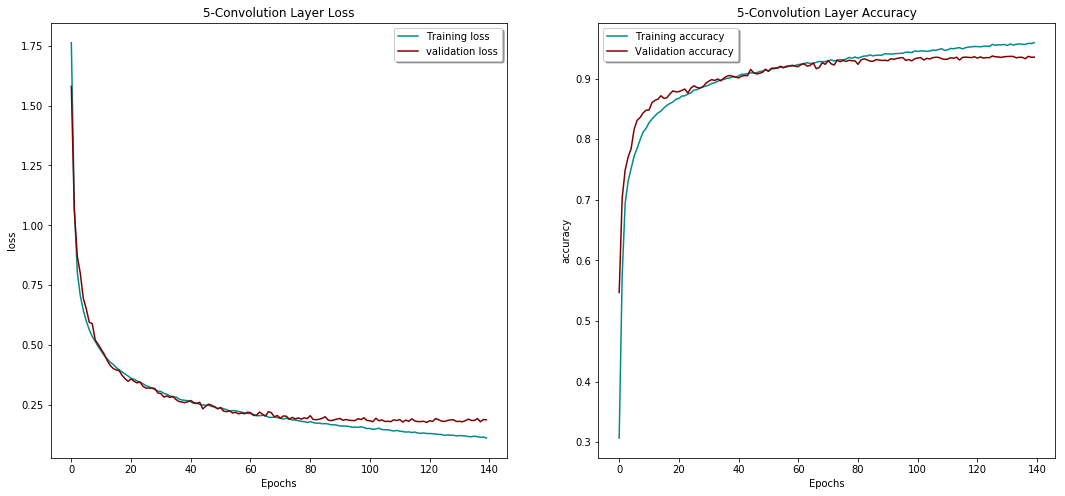

In [16]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_all.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_all.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('5-Convolution Layer Loss')
plt.subplot(122)
plt.plot(history_all.history['acc'], color='darkcyan', label="Training accuracy")
plt.plot(history_all.history['val_acc'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('5-Convolution Layer Accuracy')
plt.show()

# Image Augmentation on Batch Normalized CNN.

In [19]:
history_7 = cnn_all.fit_generator(imgen.flow(X_train, y_train,
                                         batch_size = 300),
                              steps_per_epoch = 48000//150,
                              epochs=100,
                              validation_data = imgen.flow(X_validate, y_validate,
                                                           batch_size = 300),
                              validation_steps=12000//150,
                              use_multiprocessing = True)

Epoch 1/100
320/320 [==============================] - 52s 163ms/step - loss: 0.4896 - acc: 0.8301 - val_loss: 0.3656 - val_acc: 0.8677
Epoch 2/100
320/320 [==============================] - 52s 164ms/step - loss: 0.3876 - acc: 0.8615 - val_loss: 0.3399 - val_acc: 0.8780
Epoch 3/100
320/320 [==============================] - 52s 163ms/step - loss: 0.3636 - acc: 0.8695 - val_loss: 0.3268 - val_acc: 0.8805
Epoch 4/100
320/320 [==============================] - 52s 164ms/step - loss: 0.3462 - acc: 0.8759 - val_loss: 0.3151 - val_acc: 0.8848
Epoch 5/100
320/320 [==============================] - 53s 165ms/step - loss: 0.3319 - acc: 0.8797 - val_loss: 0.3025 - val_acc: 0.8918
Epoch 6/100
320/320 [==============================] - 52s 164ms/step - loss: 0.3240 - acc: 0.8833 - val_loss: 0.2969 - val_acc: 0.8915
Epoch 7/100
320/320 [==============================] - 52s 164ms/step - loss: 0.3180 - acc: 0.8853 - val_loss: 0.2896 - val_acc: 0.8938
Epoch 8/100
320/320 [===========================

Epoch 61/100
320/320 [==============================] - 53s 167ms/step - loss: 0.2160 - acc: 0.9208 - val_loss: 0.2205 - val_acc: 0.9203
Epoch 62/100
320/320 [==============================] - 53s 166ms/step - loss: 0.2171 - acc: 0.9217 - val_loss: 0.2221 - val_acc: 0.9179
Epoch 63/100
320/320 [==============================] - 53s 166ms/step - loss: 0.2149 - acc: 0.9216 - val_loss: 0.2170 - val_acc: 0.9215
Epoch 64/100
320/320 [==============================] - 53s 166ms/step - loss: 0.2142 - acc: 0.9225 - val_loss: 0.2124 - val_acc: 0.9231
Epoch 65/100
320/320 [==============================] - 53s 165ms/step - loss: 0.2141 - acc: 0.9217 - val_loss: 0.2181 - val_acc: 0.9200
Epoch 66/100
320/320 [==============================] - 52s 164ms/step - loss: 0.2115 - acc: 0.9234 - val_loss: 0.2104 - val_acc: 0.9233
Epoch 67/100
320/320 [==============================] - 53s 165ms/step - loss: 0.2106 - acc: 0.9233 - val_loss: 0.2099 - val_acc: 0.9241
Epoch 68/100
320/320 [===================

In [21]:
history_8 = cnn_all.fit_generator(imgen.flow(X_train, y_train,
                                         batch_size = 300),
                              steps_per_epoch = 48000//150,
                              epochs=50,
                              validation_data = imgen.flow(X_validate, y_validate,
                                                           batch_size = 300),
                              validation_steps=12000//150,
                              use_multiprocessing = True)

Epoch 1/50
320/320 [==============================] - 53s 165ms/step - loss: 0.1898 - acc: 0.9310 - val_loss: 0.2097 - val_acc: 0.9228
Epoch 2/50
320/320 [==============================] - 53s 165ms/step - loss: 0.1887 - acc: 0.9318 - val_loss: 0.2036 - val_acc: 0.9260
Epoch 3/50
320/320 [==============================] - 52s 164ms/step - loss: 0.1897 - acc: 0.9307 - val_loss: 0.2065 - val_acc: 0.9245
Epoch 4/50
320/320 [==============================] - 52s 164ms/step - loss: 0.1873 - acc: 0.9316 - val_loss: 0.2053 - val_acc: 0.9246
Epoch 5/50
320/320 [==============================] - 53s 164ms/step - loss: 0.1896 - acc: 0.9310 - val_loss: 0.2086 - val_acc: 0.9245
Epoch 6/50
320/320 [==============================] - 53s 164ms/step - loss: 0.1872 - acc: 0.9314 - val_loss: 0.2008 - val_acc: 0.9271
Epoch 7/50
320/320 [==============================] - 53s 166ms/step - loss: 0.1867 - acc: 0.9317 - val_loss: 0.2003 - val_acc: 0.9257
Epoch 8/50
320/320 [==============================] - 5

In [23]:
y_pred = cnn_all.predict_classes(X_test, verbose=0)
score = cnn_all.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1] * 100)

Test loss: 0.16713964403122664
Test accuracy: 94.24


# Confusion Matrix.

In [24]:
classes = {0: 'T-shirt/top', 
           1: 'Trouser', 
           2: 'Pullover', 
           3: 'Dress', 
           4: 'Coat',
           5: 'Sandal', 
           6: 'Shirt', 
           7: 'Sneaker', 
           8: 'Bag', 
           9: 'Ankle boot'}

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
                       'Sandal','Shirt','Sneaker','Bag','Ankle boot']

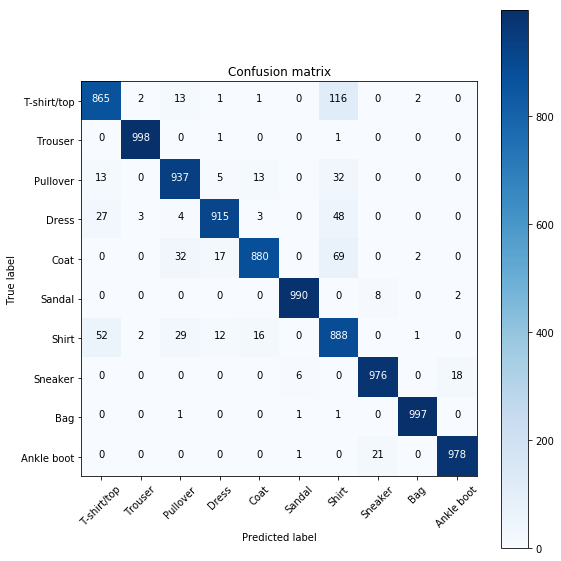

In [25]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
cnf_matrix = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes = class_names)

In [26]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.90      0.86      0.88      1000
        1.0       0.99      1.00      1.00      1000
        2.0       0.92      0.94      0.93      1000
        3.0       0.96      0.92      0.94      1000
        4.0       0.96      0.88      0.92      1000
        5.0       0.99      0.99      0.99      1000
        6.0       0.77      0.89      0.82      1000
        7.0       0.97      0.98      0.97      1000
        8.0       1.00      1.00      1.00      1000
        9.0       0.98      0.98      0.98      1000

avg / total       0.95      0.94      0.94     10000



# Conclusion

Finally, we can say that by seeing the above plotted confusion matrix that most of the misclassifications are happening between the classes Shirt, T-shirt/top, Pullover and Coat which are majorly impacting the performance of the classifier. 

And Deep Networks require large amount of training data to achieve good performance which we observed in our analysis how image augmentation boosted the classifier performance. To further improve the classifier performance, we should collect more samples and give more images from these 4 classes to the model so the classifier can learn more features or patterns even better.